**6.vanishing and exploding gradients**

train a neural network with different architectures to observe vanishing and exploding gradients

**Vanishing Gradient Model:** This model uses the tanh activation function in a deep architecture (10 layers). The tanh function can lead to vanishing gradients, especially in deeper networks.

**Exploding Gradient Model**: This model uses the ReLU activation function, which can lead to exploding gradients, especially if weights are initialized too large.
Training: Both models are trained for 50 epochs. The training loss is recorded for each epoch.



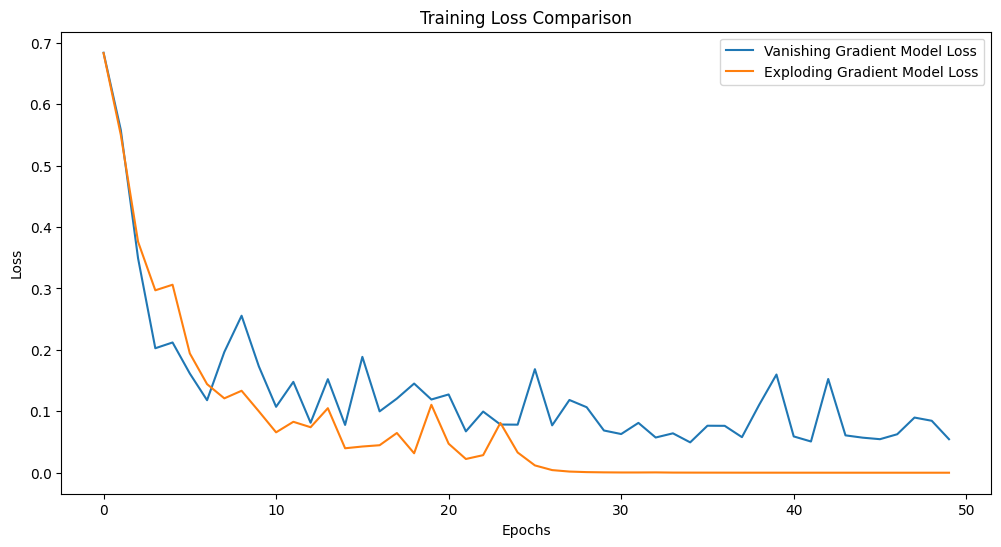

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(samples=1000):
    X = np.random.rand(samples, 10)
    y = (np.sum(X, axis=1) > 5).astype(int)  # Binary classification
    return X, y

X, y = generate_data()

# Function to create a model prone to vanishing gradients
def create_vanishing_model():
    model = keras.Sequential()
    model.add(layers.Input(shape=(10,)))
    for _ in range(10):  # Deep network
        model.add(layers.Dense(64, activation='tanh'))  # Tanh activation
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to create a model prone to exploding gradients
def create_exploding_model():
    model = keras.Sequential()
    model.add(layers.Input(shape=(10,)))
    for _ in range(10):  # Deep network
        model.add(layers.Dense(64, activation='relu'))  # ReLU activation
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the vanishing gradient model
vanishing_model = create_vanishing_model()
history_vanishing = vanishing_model.fit(X, y, epochs=50, batch_size=32, verbose=0)

# Train the exploding gradient model
exploding_model = create_exploding_model()
history_exploding = exploding_model.fit(X, y, epochs=50, batch_size=32, verbose=0)

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(history_vanishing.history['loss'], label='Vanishing Gradient Model Loss')
plt.plot(history_exploding.history['loss'], label='Exploding Gradient Model Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

***7.autoencoders and PCA ***

implement a basic autoencoder and compare its performance to principal component analysis on dimensionality reduction

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (PCA): 0.2846
Mean Squared Error (Autoencoder): 0.5952


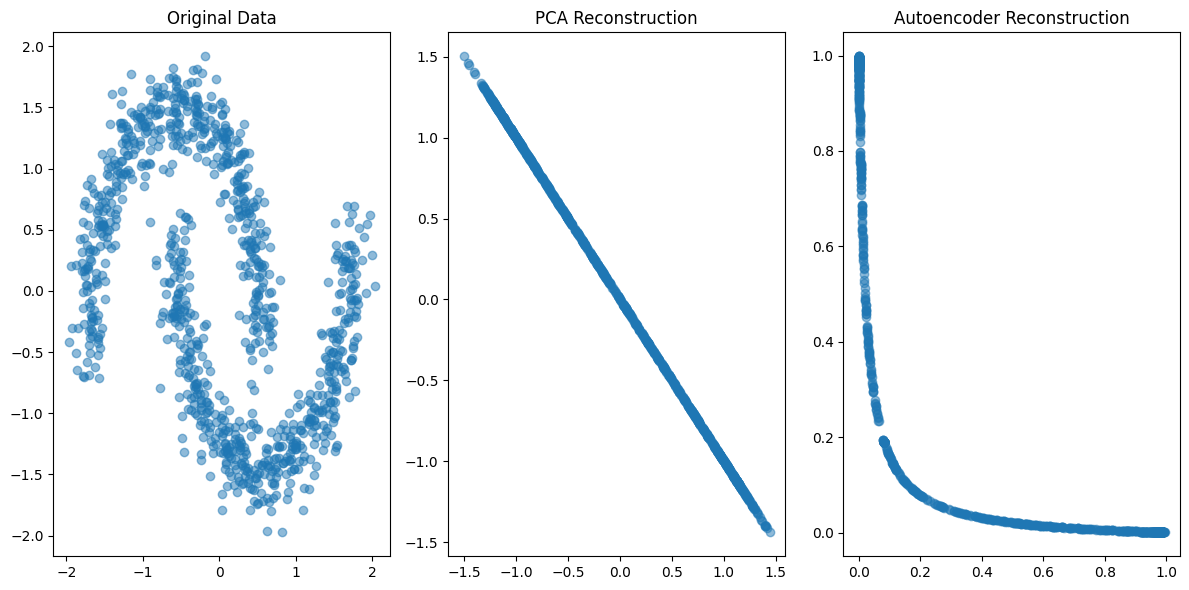

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Step 1: Generate synthetic data
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Inverse transform to reconstruct the data
X_pca_reconstructed = pca.inverse_transform(X_pca)

# Step 3: Build and train the autoencoder
autoencoder = Sequential()
autoencoder.add(Dense(2, activation='relu', input_shape=(2,)))  # Encoder
autoencoder.add(Dense(1, activation='linear'))  # Bottleneck
autoencoder.add(Dense(2, activation='sigmoid'))  # Decoder

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, shuffle=True, verbose=0)

# Encode and decode the data
X_autoencoded = autoencoder.predict(X_scaled)

# Step 4: Evaluate reconstruction error
mse_pca = np.mean((X_scaled - X_pca_reconstructed) ** 2)
mse_autoencoder = np.mean((X_scaled - X_autoencoded) ** 2)

print(f'Mean Squared Error (PCA): {mse_pca:.4f}')
print(f'Mean Squared Error (Autoencoder): {mse_autoencoder:.4f}')

# Step 5: Visualize results
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 3, 1)
plt.title('Original Data')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)

# PCA Reconstruction
plt.subplot(1, 3, 2)
plt.title('PCA Reconstruction')
plt.scatter(X_pca_reconstructed[:, 0], X_pca_reconstructed[:, 1], alpha=0.5)

# Autoencoder Reconstruction
plt.subplot(1, 3, 3)
plt.title('Autoencoder Reconstruction')
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], alpha=0.5)

plt.tight_layout()
plt.show()

**8.Regularization techniques**

 explore the effact of L2 regulazation, dropout , and noise injection on training an autoencoder

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.4409 - val_loss: 0.2406
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2356 - val_loss: 0.2194
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2174 - val_loss: 0.2077
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2081 - val_loss: 0.2045
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2052 - val_loss: 0.2021
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2028 - val_loss: 0.1963
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1963 - val_loss: 0.1927
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1926 - val_loss: 0.1904
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1908 - val_loss: 0.1888
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1895 - val_loss: 0.1864
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3312 - val_loss: 0.1591
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step 

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

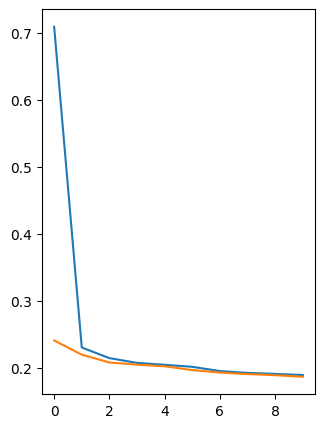

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for the autoencoder
x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))

# Function to add noise to the input data
def add_noise(data, noise_factor=0.2):
    noise = np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = data + noise_factor * noise
    return np.clip(noisy_data, 0., 1.)

# Define the autoencoder model with L2 Regularization
def create_autoencoder_with_l2():
    model = models.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28 * 28,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(128, activation='relu'),
        layers.Dense(28 * 28, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# Define the autoencoder model with Dropout
def create_autoencoder_with_dropout():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dense(28 * 28, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# Define the autoencoder model with Noise Injection
def create_autoencoder_with_noise():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(28 * 28, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# Create models
model_l2 = create_autoencoder_with_l2()
model_dropout = create_autoencoder_with_dropout()
model_noise = create_autoencoder_with_noise()

# Add noise to training data for the noise injection model
x_train_noisy = add_noise(x_train)

# Train the models
history_l2 = model_l2.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))
history_dropout = model_dropout.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))
history_noise = model_noise.fit(x_train_noisy, x_train_noisy, epochs=10, batch_size=256, validation_data=(x_test, x_test))


# Add noise to the testing data for evaluation
x_test_noisy = add_noise(x_test)

# Evaluate the models
loss_l2 = model_l2.evaluate(x_test, x_test)
loss_dropout = model_dropout.evaluate(x_test, x_test)
loss_noise = model_noise.evaluate(x_test_noisy, x_test_noisy)

print(f"L2 Regularization - Loss: {loss_l2:.4f}")
print(f"Dropout - Loss: {loss_dropout:.4f}")
print(f"Noise Injection - Loss: {loss_noise:.4f}")

# Plot the training history
plt.figure(figsize=(12, 5))

# L2 Regularization
plt.subplot(1, 3, 1)
plt.plot(history_l2.history['loss'], label='Train Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title

**9.denoising autoencoder**

 implement a denoising autoencoder and evaluate its performance in reconstructing noisy images

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.3179 - val_loss: 0.1345
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1319 - val_loss: 0.1228
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1228 - val_loss: 0.1182
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1185 - val_loss: 0.1151
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1157 - val_loss: 0.1133
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1139 - val_loss: 0.1118
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.1127 - val_loss: 0.1108
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1115 - val_loss: 0.1100
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1106 - val_loss: 0.1090
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1099 - val_loss: 0.1084
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.1094 - val_loss: 0.1082
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━

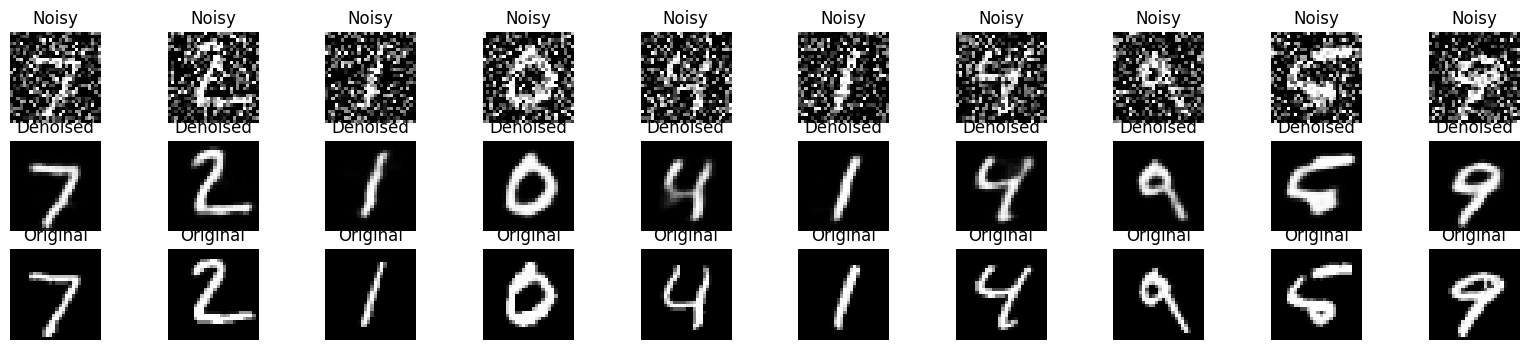

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to add a channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Add noise to the images
def add_noise(images):
    noise_factor = 0.5
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Build the denoising autoencoder model
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Evaluate the model on noisy images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot the results
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.show()

**10.batch normalization vs instance normalization**

Compare the performance of models using batch normalization and instance normalization

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.9080 - loss: 0.3123 - val_accuracy: 0.9626 - val_loss: 0.1488
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9887 - loss: 0.0392 - val_accuracy: 0.9861 - val_loss: 0.0425
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9835 - val_loss: 0.0568
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9950 - loss: 0.0157 - val_accuracy: 0.9854 - val_loss: 0.0456
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9971 - loss: 0.0098 - val_accuracy: 0.9873 - val_loss: 0.0507
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.8908 - loss: 0.3775 - val_accuracy: 0.9825 - val_loss: 0.0515
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9859 - loss: 0.0441 - val_accuracy: 0.9819 - val_loss: 0.0550
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9905 - loss: 0.0287 - val_accu

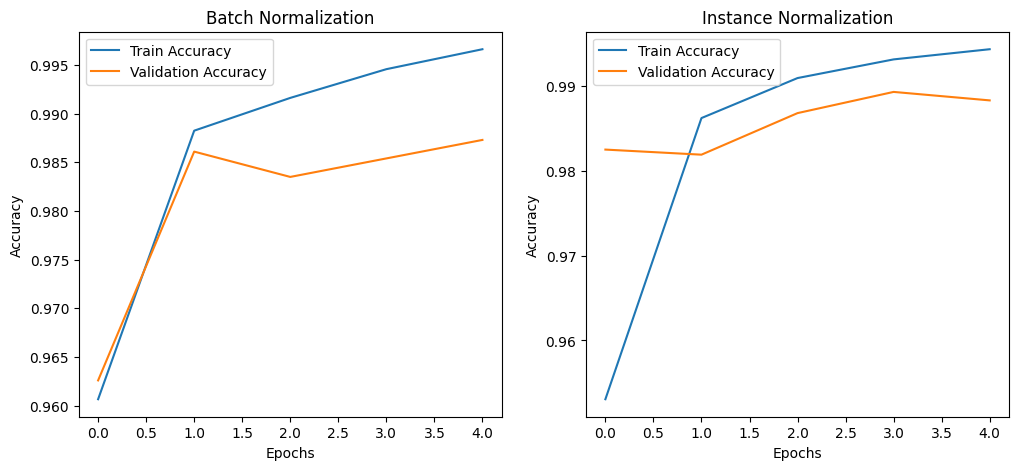

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to add a channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the model with Batch Normalization
def create_model_with_bn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the Instance Normalization layer
class InstanceNormalization(layers.Layer):
    def __init__(self, **kwargs):
        super(InstanceNormalization, self).__init__(**kwargs)

    def call(self, inputs):
        # Compute the mean and variance for each instance (image)
        mean, variance = tf.nn.moments(inputs, axes=[1, 2], keepdims=True)
        return (inputs - mean) / tf.sqrt(variance + 1e-5)

    def compute_output_shape(self, input_shape):
        return input_shape  # Output shape is the same as input shape

# Define the model with Instance Normalization
def create_model_with_in():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        InstanceNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        InstanceNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models
model_bn = create_model_with_bn()
model_in = create_model_with_in()

# Train both models
history_bn = model_bn.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))
history_in = model_in.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the models
loss_bn, accuracy_bn = model_bn.evaluate(x_test, y_test)
loss_in, accuracy_in = model_in.evaluate(x_test, y_test)

print(f"Batch Normalization - Test Accuracy: {accuracy_bn:.4f}")
print(f"Instance Normalization - Test Accuracy: {accuracy_in:.4f}")

# Plot the training history
plt.figure(figsize=(12, 5))

# Batch Normalization
plt.subplot(1, 2, 1)
plt.plot(history_bn.history['accuracy'], label='Train Accuracy')
plt.plot(history_bn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Batch Normalization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Instance Normalization
plt.subplot(1, 2, 2)
plt.plot(history_in.history['accuracy'], label='Train Accuracy')
plt.plot(history_in.history['val_accuracy'], label='Validation Accuracy')
plt.title('Instance Normalization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()